In [2]:
from drivecycle import trajectory, drivecycle, plots, utils, graph, energy
import matplotlib.pyplot as plt
import numpy as np
import inspect

In [3]:
traj = trajectory.const_accel(vi=0,v_target=12,vf=0,di=0,df=450,step=1,a_max=0.5)
traj = traj[1:]

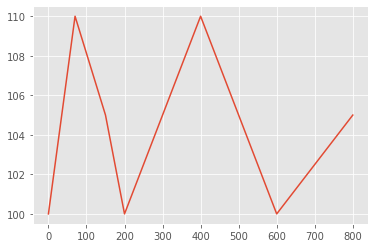

In [4]:
elv = np.array([[0,100],[70,110],[150,105],[200,100],[400,110],[600,100],[800,105]])
x = [i[0] for i in elv]
y = [i[1] for i in elv]
    
plt.plot(x,y)

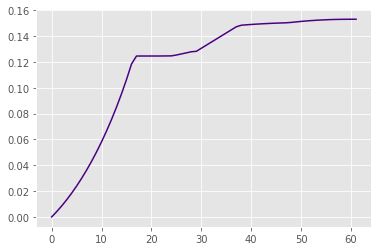

In [12]:
power = energy.battery_model(traj, elv, m=15000, regen_ratio=0.5)

t=[i[0] for i in power]
p=[i[5] for i in power]

plt.plot(t,p, color='#4b0082', linewidth=1.5)